In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file = '../data/NASA Near-Earth Objects-CleanbyThang.csv'
df = pd.read_csv(file,index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 2001981 to 54073367
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   absolute_magnitude_h               23999 non-null  float64
 1   is_potentially_hazardous_asteroid  23999 non-null  bool   
 2   is_sentry_object                   23999 non-null  bool   
 3   kilometers_estimated_diameter_min  23999 non-null  float64
 4   kilometers_estimated_diameter_max  23999 non-null  float64
 5   orbit_class_type                   23999 non-null  object 
 6   perihelion_distance                23999 non-null  float64
 7   aphelion_distance                  23999 non-null  float64
 8   first_observation_date             23999 non-null  object 
 9   last_observation_date              23999 non-null  object 
 10  orbit_class_description            23999 non-null  object 
dtypes: bool(2), float64(5), object(4)
memory usage: 1.

In [5]:
df['first_observation_date'] = pd.to_datetime(df['first_observation_date'])
df['last_observation_date'] = pd.to_datetime(df['last_observation_date'])



In [6]:
df= df.drop(columns=['orbit_class_description'])

In [7]:
# đánh giá ma trận tương quan

category_col = ['orbit_class_range','is_sentry_object']
numeric_col = ['absolute_magnitude_h','kilometers_estimated_diameter_min','kilometers_estimated_diameter_max','perihelion_distance','aphelion_distance','first_observation_date','last_observation_date']
target_col = 'is_potentially_hazardous_asteroid'


In [8]:
# để đánh giá tương quan một biến dàng nhị phân và các biến liên tục ta dùng Point Biserial Correlation
from scipy.stats import pointbiserialr
corr_numeric = []
for col in numeric_col:
    if df[col].dtype == 'datetime64[ns]':
        df[col] = df[col].dt.year
    corr = pointbiserialr(df[target_col],df[col])
    corr_numeric.append([col,corr[0],corr[1]])
    
for res in corr_numeric:
    if res[2] < 0.05:
        print(f"{res[0]}: {res[1]}")
    else:
        print(f"{res[0]}: {res[1]} - Không có tương quan")
        
    

absolute_magnitude_h: -0.29817214696194916
kilometers_estimated_diameter_min: 0.17505221765601386
kilometers_estimated_diameter_max: 0.17505221765617768
perihelion_distance: -0.2064188018674699
aphelion_distance: 0.009944115108585082 - Không có tương quan
first_observation_date: -0.19954572121037456
last_observation_date: 0.10059930349653132


In [9]:
unique_aphelion_distance_count = df['aphelion_distance'].nunique()
print(f"Số giá trị khác nhau của cột aphelion_distance: {unique_aphelion_distance_count}")

Số giá trị khác nhau của cột aphelion_distance: 23999


In [10]:
df['aphelion_distance'].describe()
df['perihelion_distance'].value_counts()

perihelion_distance
0.928007    1
0.621512    1
1.238537    1
1.050403    1
0.790185    1
           ..
0.483909    1
1.016900    1
0.447827    1
1.042732    1
1.055496    1
Name: count, Length: 23999, dtype: int64

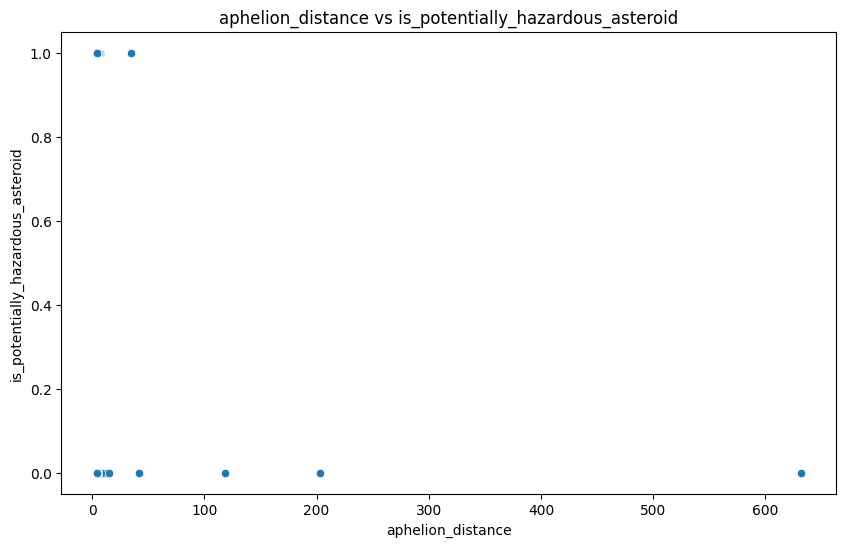

In [12]:
newdf = df[df['aphelion_distance'] > 4 ]
# biểu diễn aphelion_distance để giải thích tại sao không có tương quan
plt.figure(figsize=(10,6))
sns.scatterplot(x='aphelion_distance',y='is_potentially_hazardous_asteroid',data=newdf)
plt.title('aphelion_distance vs is_potentially_hazardous_asteroid')
plt.xlabel('aphelion_distance')
plt.ylabel('is_potentially_hazardous_asteroid')
plt.show()


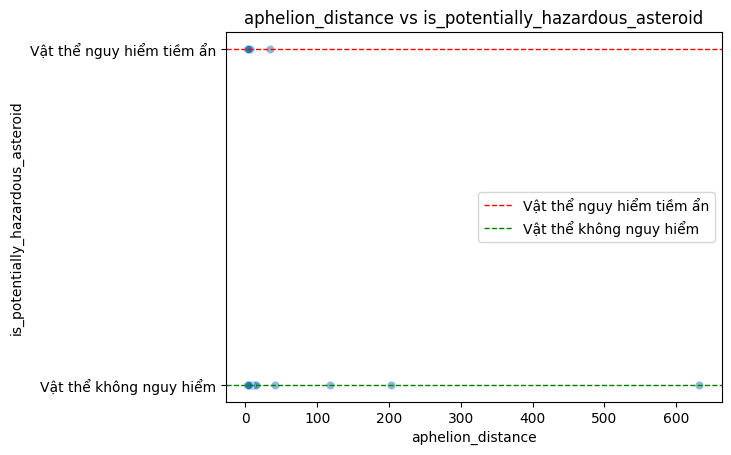

In [19]:
# Create scatter plot
sns.scatterplot(x='aphelion_distance', 
                y='is_potentially_hazardous_asteroid',
                data=newdf,
                alpha=0.5)

# Add horizontal lines for True/False values
plt.axhline(y=1, color='r', linestyle='--', label='Vật thể nguy hiểm tiềm ẩn', linewidth=1)
plt.axhline(y=0, color='g', linestyle='--', label='Vật thể không nguy hiểm', linewidth=1)

# Customize plot
plt.title('aphelion_distance vs is_potentially_hazardous_asteroid')
plt.xlabel('aphelion_distance')
plt.ylabel('is_potentially_hazardous_asteroid')

# Hide y-axis ticks but keep the label
plt.yticks([0, 1], ['Vật thể không nguy hiểm', 'Vật thể nguy hiểm tiềm ẩn'])

# Add legend
plt.legend()

plt.show()

In [20]:
# tính tỉ lệ thành công trong aphelion_distance

# thành công
df[df['']]
newdf.count()

KeyError: ''